# Pymaceuticals Inc.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
data_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [3]:
# Checking the number of mice.
mice_count = data_df["Mouse ID"].nunique()
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = data_df.loc[data_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_all = data_df.loc[data_df["Mouse ID"] == "g989", :]
dup_mice_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df["Mouse ID"].isin(dup_mice) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_summary = clean_df.groupby("Drug Regimen")

tumor_mean = stat_summary["Tumor Volume (mm3)"].mean()
tumor_median = stat_summary["Tumor Volume (mm3)"].median()
tumor_var = stat_summary["Tumor Volume (mm3)"].var()
tumor_stdev = stat_summary["Tumor Volume (mm3)"].std()
tumor_sem = stat_summary["Tumor Volume (mm3)"].sem()

stat_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                            "Median Tumor Volume": tumor_median,
                            "Variance Tumor Volume": tumor_var, 
                            "Standard Deviation Tumor Volume": tumor_stdev,
                            "SEM Tumor Volume": tumor_sem})

stat_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
ag_summary =  clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
ag_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

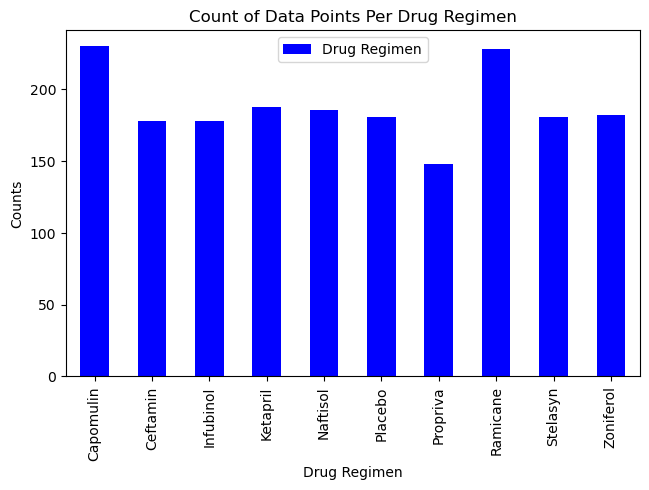

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_grp = clean_df.groupby("Drug Regimen")
drug_grp_ct = pd.DataFrame(drug_grp["Drug Regimen"].count())

drug_grp_plt = drug_grp_ct.plot(kind = "bar", color = "blue")

plt.tight_layout()

plt.title("Count of Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")
        
plt.show()

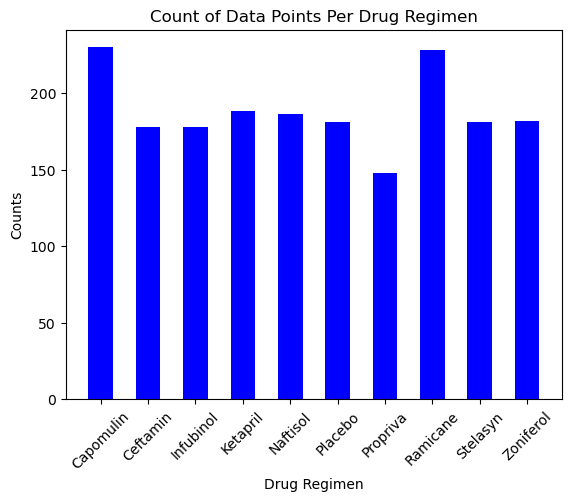

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(drug_grp_ct))

plt.bar(x_axis, drug_grp_ct["Drug Regimen"], color = "blue", align = "center", width = 0.52)

plt.title("Count of Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_grp_ct.index.values)
plt.xticks(rotation=45)

plt.show()

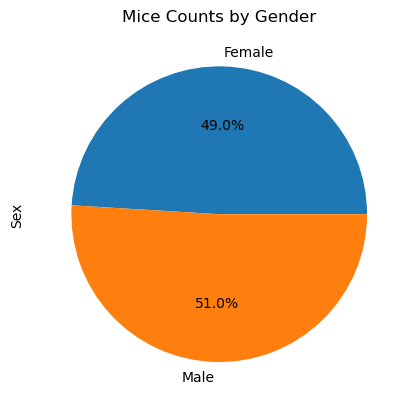

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_grp = clean_df.groupby("Sex")

gender_grp_ct = pd.DataFrame(gender_grp["Sex"].count())

gender_grp_ct.plot(kind = "pie", y = "Sex", title = "Mice Counts by Gender", autopct = "%1.1f%%", legend = False)

plt.show()

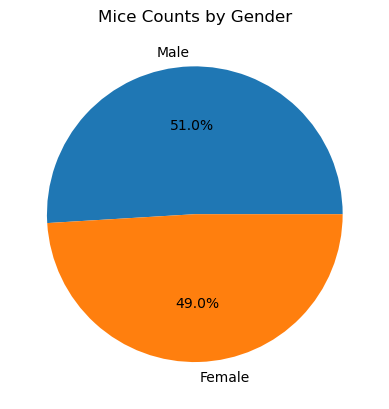

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Identify distribution of data by sex
gender = clean_df["Sex"].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(gender, labels = gender.index.values, autopct = "%1.1f%%")
plt.title("Mice Counts by Gender")


plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_tmpt_df = pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "max_timepoint"})
max_tmpt_df

# Merge max timepoint onto data_df
max_merged_df = pd.merge(clean_df, max_tmpt_df, on="Mouse ID")
max_merged_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_list = []

for drug in drugs:
    
    drug_lp_df = max_merged_df.loc[max_merged_df["Drug Regimen"] == drug]
    
    max_vol_df = drug_lp_df.loc[drug_lp_df["Timepoint"] == drug_lp_df["max_timepoint"]]
    
    values = max_vol_df["Tumor Volume (mm3)"]
    drug_list.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'{drug} IQR is {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'{drug} lower bound is {lower_bound}')
    print(f'{drug} upper bound is {upper_bound}')
    
    outliers_count = (values.loc[(max_vol_df["Tumor Volume (mm3)"] >= upper_bound) | 
                                        (max_vol_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f'{drug} outlier count is {outliers_count}')
    


Capomulin IQR is 7.781863460000004
Capomulin lower bound is 20.70456164999999
Capomulin upper bound is 51.83201549
Capomulin outlier count is 0
Ramicane IQR is 9.098536719999998
Ramicane lower bound is 17.912664470000003
Ramicane upper bound is 54.30681135
Ramicane outlier count is 0
Infubinol IQR is 11.477135160000003
Infubinol lower bound is 36.83290494999999
Infubinol upper bound is 82.74144559000001
Infubinol outlier count is 1
Ceftamin IQR is 15.577752179999997
Ceftamin lower bound is 25.355449580000002
Ceftamin upper bound is 87.66645829999999
Ceftamin outlier count is 0


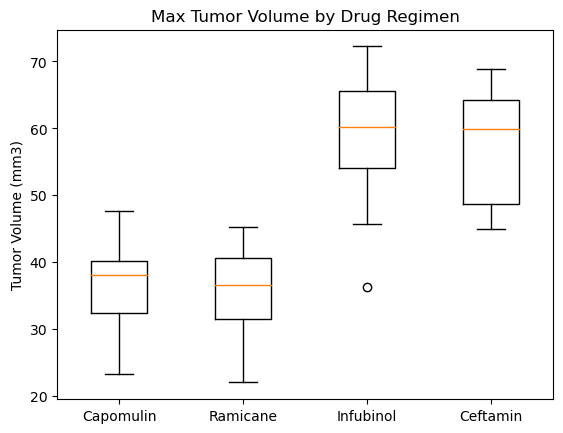

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


fig1, ax1 = plt.subplots()
ax1.set_title("Max Tumor Volume by Drug Regimen")
ax1.boxplot(drug_list)
ax1.set_ylabel("Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

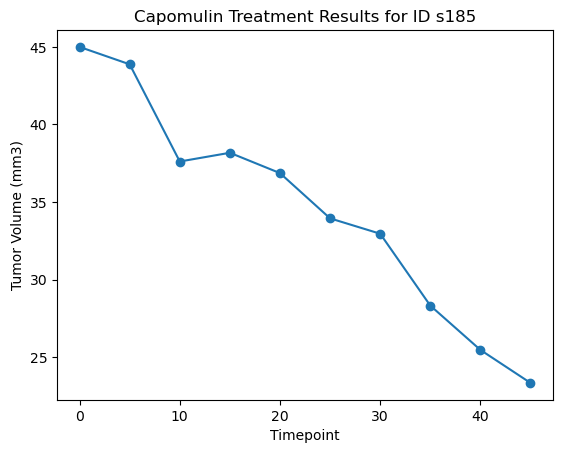

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


cap_mice_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_mice_df

mouse = clean_df.loc[clean_df["Mouse ID"] == "s185"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker = "o")
plt.title("Capomulin Treatment Results for ID s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


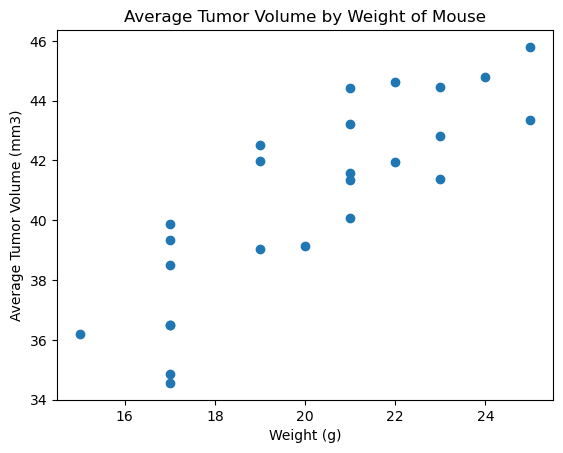

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol_df = pd.DataFrame(cap_mice_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor_vol"})

# Merge average tumor volume onto data_df and drop duplicates
avg_tumor_vol_df = pd.merge(cap_mice_df, avg_tumor_vol_df, on = "Mouse ID")
final_avg_tumor = avg_tumor_vol_df[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
final_avg_tumor

x = final_avg_tumor["Weight (g)"]
y = final_avg_tumor["avg_tumor_vol"]

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight of Mouse")

# Display plot
plt.show()

## Correlation and Regression

The correlation between mouse weight(g) and average volume of tumor for Capomulin Treatment is 0.84


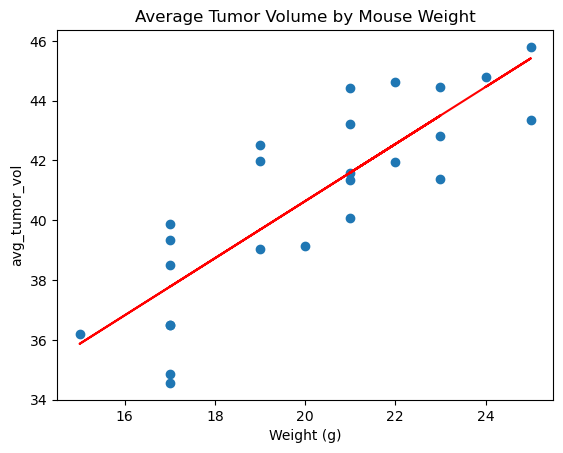

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

avg_tumor_vol_df = pd.DataFrame(cap_mice_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor_vol"})

avg_tumor_vol_df = pd.merge(cap_mice_df, avg_tumor_vol_df, on = "Mouse ID")
final_avg_tumor = avg_tumor_vol_df[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
final_avg_tumor

x = final_avg_tumor["Weight (g)"]
y = final_avg_tumor["avg_tumor_vol"]

correlation = st.pearsonr(x, y)
print(f"The correlation between mouse weight(g) and average volume of tumor for Capomulin Treatment is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Average Tumor Volume by Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("avg_tumor_vol")
plt.show()

